# [Logistic Regression Manual Code](https://youtu.be/tLezwPKvPK4?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH)   
## Code

In [12]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [21]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_classes=2,
                          random_state=41,class_sep=40,hypercube=False,n_clusters_per_class=1,n_redundant=0)

In [22]:
X.shape,y.shape

((100, 2), (100,))

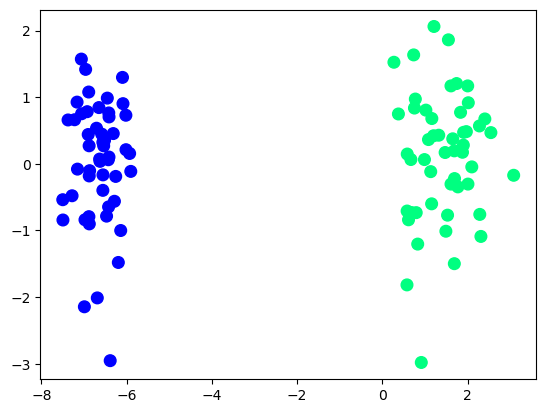

In [23]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=70)

In [24]:
def step(x):
    return 1 if x > 0 else 0


indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
def get_index(x):
    if x > len(indexes) -1:
        x = 0
    return indexes[x]
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = get_index(i)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
    return weights[0],weights[1:]

In [25]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.09140105 0.70190757]
1.1


In [26]:
m = - (coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

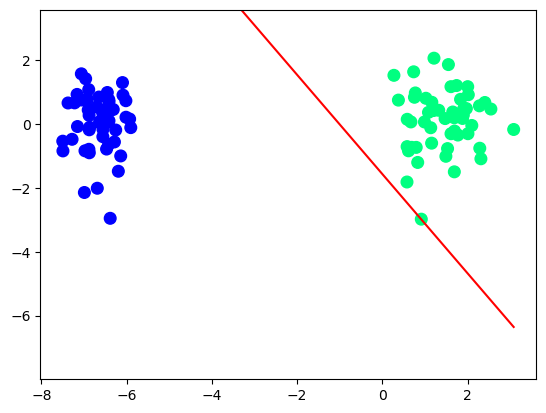

In [28]:
x_input = np.linspace(X.min(),X.max(),X.shape[0])
y_input = m*x_input + b


plt.plot(x_input,y_input,c='r')
plt.scatter(X[:,0],X[:,1],c=y,s=70,cmap='winter')

plt.ylim(X.min() - 0.5,X.max() + 0.5)
plt.show()

# Drawback of perceptron Trick  
perceptron does the job but doesn't end it efficiently.. its only job is to update until all the data points aren't classified. once the line has both of the separate classes of data on separate side, it will halt the further procedure infact there is no further procedure.. where as official sklearn's logisticregression doesn't stop there... it will make sure that the line cuts the classes as symmetrically as possible...  
### Following shows how logistic regression's line will classify the data vs how perceptron does.  
![ytss](assets/drawback.png)